# Introduction to Machine Learning
In this notebook you will implement your first machine learning algorithm to analyze a population health dataset: the Pima Indian diabetes dataset. The purpose of this analysis is to learn how to utilize machine learning to solve a very specific problem - identifying individuals at risk of diabetes.

## Contents
1. Import dataset
2. Data exploration
3. Feature engineering
4. Modeling

## How to use this notebook
- To execute any single block of text or markdown, use ctrl+enter, shift+enter or press the run arrow on the left of the box (only in Colaboratory)
- To reset the notebook select "Factory reset runtime" from the Runetime tab at the top of Colaboratory

## 1. Import dataset

In [1]:
# First let's import our data
import pandas as pd

url = 'https://raw.githubusercontent.com/jzhangab/DS101/master/1_Data/diabetes.csv'
df = pd.read_csv(url, sep = ',')

In [2]:
# Let's look at the first 5 rows to begin understanding what factors are available
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


From the data frame we can see that the data consists of 8 different factors that contribute to the risk of diabetes. The actual truth of whether or not an individual has diabetes is in the column "Outcome". We will use this information to train a machine learning model to understand how the different factors are connected.

## 2. Data Exploration
The purpose of data exploration is to seek to understand the data. We will look primarily at histograms and scatterplots to visualize if there are any interesting relationships.

C:\Users\jzhang33\AppData\Local\Continuum\anaconda3\envs\QAteam\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014852128208>,
      dtype=object)

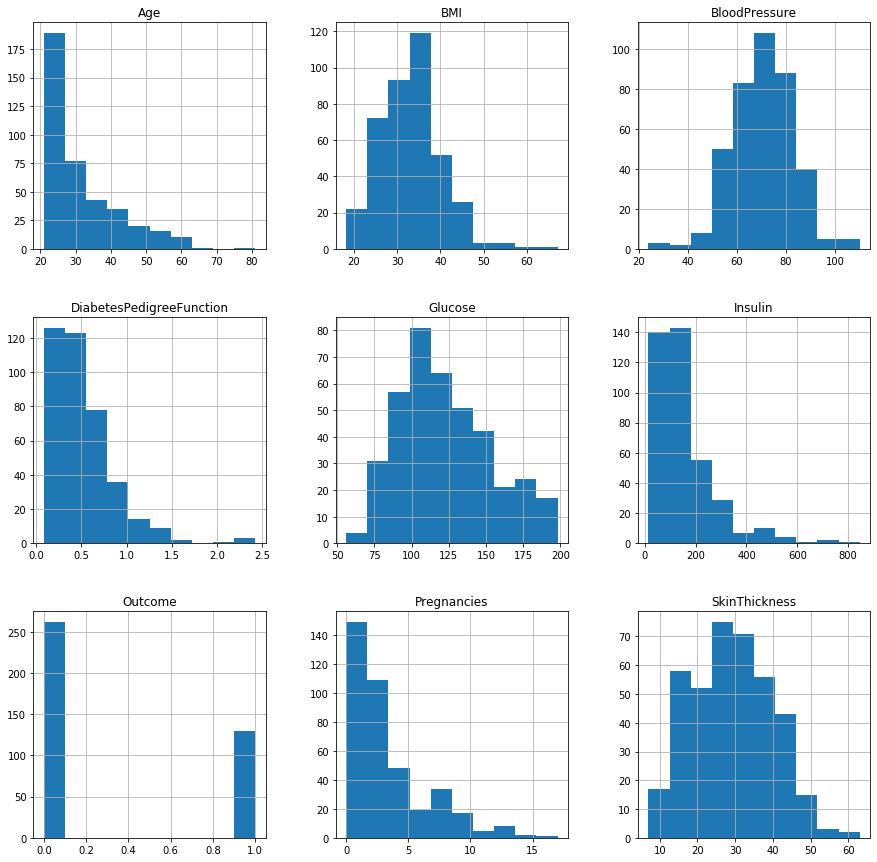

In [17]:
# Let's take a look at the histograms of the dataframe to understand each factor.
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

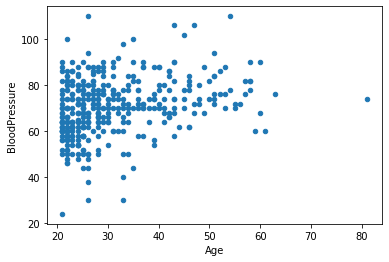

In [18]:
# Age is skewed young, but how does it relate to one of the more normally distributed factors such as BloodPressure?
# Try changing the x and y variables in the scat4terplot to view other relationships.
%matplotlib inline
df.plot.scatter(x = 'Age',
                y = 'BloodPressure')

## 3. Feature Engineering
The purpose of feature engineering is to prepare data for modeling. The diabetes data set is formatted well and does not contain text variables so we will only do two things to prepare the data

1. Missing data
2. Reduce multicollinearity

In [4]:
# By far the most important thing to understand about a dataset is how "clean" it might be
# For cleanliness, missing data is very important, let's check how much missing data there is for each factor
for col in list(df):
    num_null = len(df[col]) - df[col].count()
    print ("Percent null in column " + col + " is:", 100*num_na/len(df[col]))

Percent null in column Pregnancies is: 0.0
Percent null in column Glucose is: 0.0
Percent null in column BloodPressure is: 0.0
Percent null in column SkinThickness is: 0.0
Percent null in column Insulin is: 0.0
Percent null in column BMI is: 0.0
Percent null in column DiabetesPedigreeFunction is: 0.0
Percent null in column Age is: 0.0
Percent null in column Outcome is: 0.0


In [6]:
# For some columns such as Glucose, BloodPressure, SkinThickness, Insulin, BMI, and Age we are not only concerned with null values but also 0 values
for col in list(df):
    num_0 = len(df.loc[df[col] == 0][col])
    print ("Percent 0 in column " + col + " is:", 100*num_0/len(df[col]))

Percent 0 in column Pregnancies is: 14.453125
Percent 0 in column Glucose is: 0.6510416666666666
Percent 0 in column BloodPressure is: 4.557291666666667
Percent 0 in column SkinThickness is: 29.557291666666668
Percent 0 in column Insulin is: 48.697916666666664
Percent 0 in column BMI is: 1.4322916666666667
Percent 0 in column DiabetesPedigreeFunction is: 0.0
Percent 0 in column Age is: 0.0
Percent 0 in column Outcome is: 65.10416666666667


In [7]:
# Let's do the following to clean our data
# 1. Replace all null values with 0
# 2. Remove any data point where any of the following are 0: Glucose, BloodPressure, SkinThickness, Insulin, BMI, or Age

df.fillna(0, inplace=True)

nonzero_factors = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in nonzero_factors:
    df = df.loc[df[col] != 0]

### Multicollinearity
The idea of collinearity is that if certain input factors are closely correlated, they will bias the output of the model by amplifying their particular effects. We need to understand if some of our factors are high collinear and then reduce bias by removing all but 1 of the collinear factors from the dataframe.

In [9]:
# We can check the correlation (R-square) between variables using a correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [14]:
# To quantify multicollinearity, we will use variance inflation factor
# Rule of thumb, VIF above 10 indicates a particular variable ought to be removed
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_c = add_constant(df)
pd.Series([variance_inflation_factor(df_c.values, i) 
               for i in range(df_c.shape[1])], 
              index=df_c.columns)

C:\Users\jzhang33\AppData\Local\Continuum\anaconda3\envs\QAteam\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                       62.822822
Pregnancies                  1.912621
Glucose                      1.939119
BloodPressure                1.231818
SkinThickness                1.854913
Insulin                      1.557621
BMI                          2.009136
DiabetesPedigreeFunction     1.079602
Age                          2.154163
Outcome                      1.528522
dtype: float64

## 4. Modeling
In the modeling step we will train a supervised machine learning model to understand relationships in the diabetes data set. We will then evaluate the model to see how well it predicts.

The particular model that we will use is Logistic Regression. This model is commonly used in binary classification for predictive analytics.

1. Split dataset into training and validation datasets
2. Train model
3. Predict outcomes of validation dataset
4. Calculate accuracy of validation dataset

In [24]:
# We will split the data 80%/20% using 80% of the data to train the model and 20% to validate the accuracy of the model
# We can use pre-built functions from the machine learning package sci-kit learn to do this task
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

features = [col for col in list(df) if col != 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Outcome'], test_size=0.2, random_state=0)

In [25]:
# Declare and fit model
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

C:\Users\jzhang33\AppData\Local\Continuum\anaconda3\envs\QAteam\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predict using test set
y_pred = model.predict(X_test)

In [30]:
# Compare y_test (true values) to y_pred (predicted values)
accuracy_score(y_test, y_pred)

0.7848101265822784

In [31]:
# Let's take a look at the confusion matrix, which shows us false positives and false negatives
confusion_matrix(y_test, y_pred)

array([[50,  4],
       [13, 12]], dtype=int64)